In [145]:
#Importando as bibliotecas
import gdown
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.ticker as ticker
from ydata_profiling import ProfileReport

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import davies_bouldin_score
# KMeans Clustering
from sklearn.cluster import KMeans

drive.mount('/content/drive')
dataset = '/content/drive/MyDrive/DATASETS/Adidas Vs Nike.csv'


#Criando o dataframe e apresentando as 5 primeiras linhas
df = pd.read_csv(dataset)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [81]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [89]:
#Convertendo ultimas visitas em datetime e criando colunas com Ano, Mês e Dia
df['Last Visited'] = pd.to_datetime(df['Last Visited'])
df['Year'] = df['Last Visited'].dt.year
df['Month'] = df['Last Visited'].dt.month
df['Day'] = df['Last Visited'].dt.day
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Year,Month,Day
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14,2020,4,13
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15,2020,4,13
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15,2020,4,13
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15,2020,4,13
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15,2020,4,13


In [90]:
#Verificando os dados únicos da coluna de Marca
df.Brand.unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [91]:
#Substituindo o valor Adidas Adidas ORIGINALS por Adidas ORIGINALS
df['Brand'] = df['Brand'].replace({'Adidas Adidas ORIGINALS': 'Adidas ORIGINALS'})
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Year,Month,Day
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14,2020,4,13
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15,2020,4,13
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15,2020,4,13
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15,2020,4,13
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15,2020,4,13


In [92]:
#Conferindo a substituição
df.Brand.unique()

array(['Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [93]:
#Verificando os dados ausentes
ausentes = df.isnull().sum()
ausentes

,0
Product Name,0
Product ID,0
Listing Price,0
Sale Price,0
Discount,0
Brand,0
Description,3
Rating,0
Reviews,0
Last Visited,0


In [94]:
#Verificando o número de linhas duplicadas
lin_duplicadas = df.duplicated().sum()
lin_duplicadas

0

In [95]:
#Analise exploratória dos dados
df.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews,Last Visited,Year,Month,Day
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000,3268,3268.0,3268.0,3268.0
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714,2020-04-13 15:12:10.009792,2020.0,4.0,13.0
min,0.000000,449.000000,0.000000,0.000000,0.000000,2020-04-13 15:06:14,2020.0,4.0,13.0
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000,2020-04-13 15:06:47,2020.0,4.0,13.0
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000,2020-04-13 15:07:20,2020.0,4.0,13.0
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000,2020-04-13 15:07:53,2020.0,4.0,13.0
max,29999.000000,36500.000000,60.000000,5.000000,223.000000,2020-04-13 15:42:57,2020.0,4.0,13.0
std,4724.659386,4293.247581,22.633487,1.428856,31.543491,NaN,0.0,0.0,0.0


In [96]:
#Criando uma cópia de segurança dos dados
df1 = df.copy()
df1.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Year,Month,Day
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14,2020,4,13
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15,2020,4,13
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15,2020,4,13
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15,2020,4,13
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15,2020,4,13


In [97]:
cont_produtos = df['Brand'].value_counts()
total_products = len(df)
porcent_por_marca = (cont_produtos / total_products) * 100
porcent_por_marca

,count
Brand,
Adidas CORE / NEO,33.996328
Adidas ORIGINALS,27.784578
Nike,19.675643
Adidas SPORT PERFORMANCE,18.543452


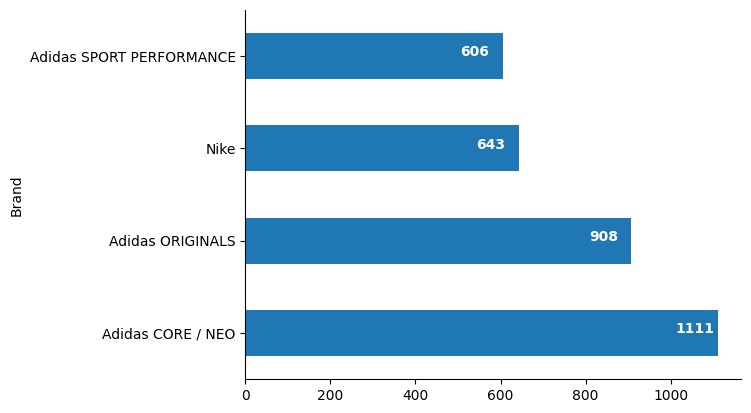

In [83]:
#Contagem de produtos por marca
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
df1.Brand.value_counts().plot(kind='barh')
for y, x in enumerate(df1.Brand.value_counts().values):
    plt.text(x-100, y, "%s" %x,c='white',weight='bold')

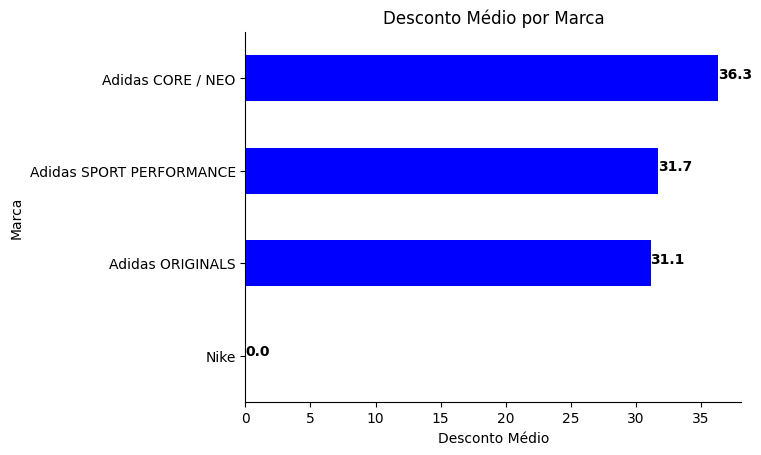

In [27]:
#Análise de média de descontos por Marca
desconto_medio_marcas = df1.groupby('Brand')['Discount'].mean().sort_values(ascending=True)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
desconto_medio_marcas.plot(kind='barh', color='blue')
for y, x in enumerate(desconto_medio_marcas.values):
    plt.text(x, y, "%.1f" % x, c='black', weight='bold')
plt.title('Desconto Médio por Marca')
plt.xlabel('Desconto Médio')
plt.ylabel('Marca')
plt.show()

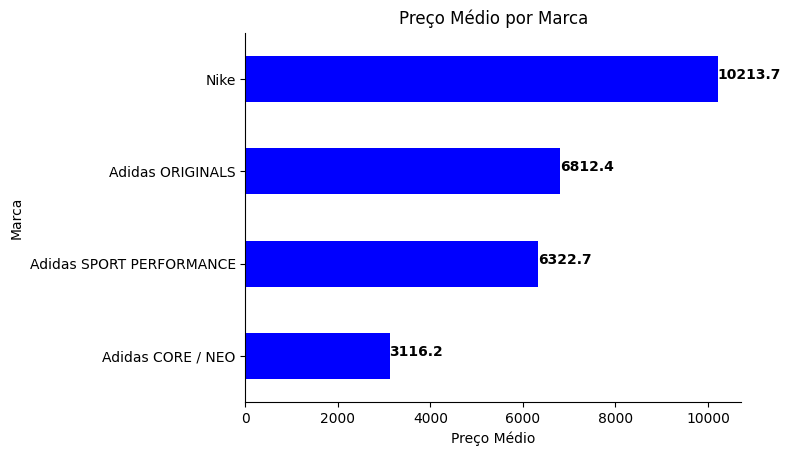

In [28]:
#Analise de média de Preço por Marca
preco_medio_marcas = df1.groupby('Brand')['Sale Price'].mean().sort_values(ascending=True)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
preco_medio_marcas.plot(kind='barh', color='blue')
for y, x in enumerate(preco_medio_marcas.values):
    plt.text(x, y, "%.1f" % x, c='black', weight='bold')
plt.title('Preço Médio por Marca')
plt.xlabel('Preço Médio')
plt.ylabel('Marca')
plt.show()

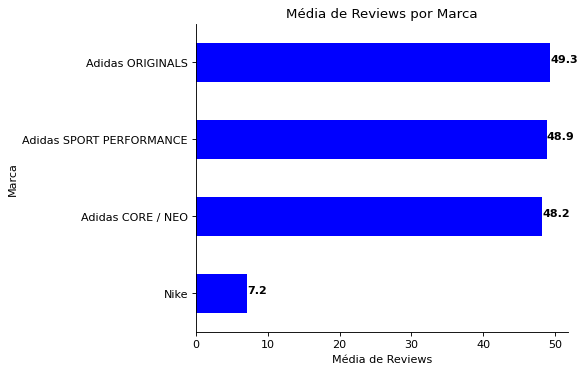

In [136]:
media_reviews_por_marca = df1.groupby('Brand')['Reviews'].mean().sort_values(ascending=True)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
media_reviews_por_marca.plot(kind='barh', color='blue')
for y, x in enumerate(media_reviews_por_marca.values):
    plt.text(x, y, "%.1f" % x, c='black', weight='bold')
plt.title('Média de Reviews por Marca')
plt.xlabel('Média de Reviews')
plt.ylabel('Marca')
plt.show()

<ipython-input-104-78218ee29c12>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_class_por_marca.index, y=media_class_por_marca.values, palette='viridis')


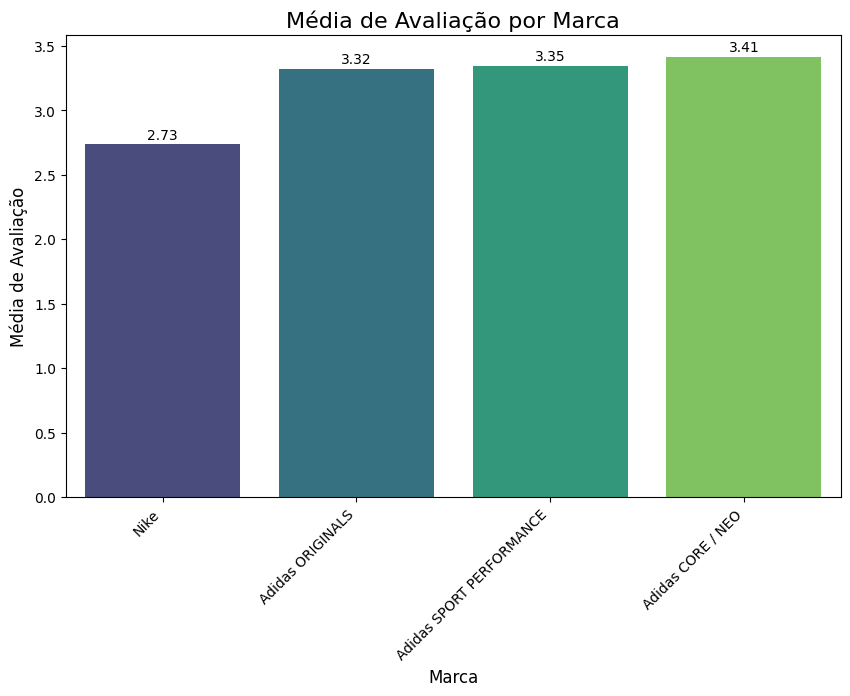

In [104]:
media_class_por_marca = df1.groupby('Brand')['Rating'].mean().sort_values(ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=media_class_por_marca.index, y=media_class_por_marca.values, palette='viridis')
plt.title('Média de Avaliação por Marca', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Média de Avaliação', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(media_class_por_marca.values):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

In [137]:
nike_df2 = df1[df1['Brand'] == 'Nike']
nike_maiores_precos = nike_df2.sort_values(by='Sale Price', ascending=False).head(10)
nike_maiores_precos

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Year,Month,Day,Score Ponderado
3148,Nike Air VaporMax Flyknit 2 LXX,AT5673-700,0,36500,0,Nike,The Nike Air VaporMax Flyknit 2 LXX places you...,0.0,0,2020-04-13 15:36:42,2020,4,13,0.000000
2693,Nike Mercurial Superfly 7 Elite SE FG,CT1099-093,0,24995,0,Nike,Everyone starts somewhere and Kylian Mbappé st...,0.0,0,2020-04-13 15:28:15,2020,4,13,0.000000
3149,Nike Mercurial Superfly 7 Elite SE FG,CT1099-093,0,24995,0,Nike,Everyone starts somewhere and Kylian Mbappé st...,0.0,0,2020-04-13 15:36:43,2020,4,13,0.000000
3164,Nike Mercurial Superfly 7 Elite MDS FG,BQ5469-703,0,24995,0,Nike,Dream of speed and play fast in the Nike Mercu...,5.0,1,2020-04-13 15:36:47,2020,4,13,3.465736
2931,Nike Mercurial Superfly 7 Elite MDS FG,BQ5469-703,0,24995,0,Nike,Dream of speed and play fast in the Nike Mercu...,5.0,1,2020-04-13 15:32:30,2020,4,13,3.465736
2862,Nike Mercurial Vapor 13 Elite Neymar Jr. FG,AT7898-104,0,22995,0,Nike,"Building on the 360 innovation of the 12, the ...",0.0,0,2020-04-13 15:30:39,2020,4,13,0.000000
3024,Nike Mercurial Superfly 7 Elite SE FG,CD6721-808,0,22995,0,Nike,Building on the 360-degree Flyknit innovation ...,0.0,0,2020-04-13 15:32:45,2020,4,13,0.000000
2897,Nike Phantom Vision 2 Elite Dynamic Fit FG,CD4161-606,0,22995,0,Nike,The Nike Phantom Vision 2 Elite Dynamic Fit FG...,5.0,1,2020-04-13 15:32:21,2020,4,13,3.465736
3238,Nike Mercurial Superfly 7 Elite FG,AQ4174-049,0,22995,0,Nike,"Building on the 360 innovation of the 6, the N...",4.3,8,2020-04-13 15:38:45,2020,4,13,9.448066
3057,Nike Phantom Vision 2 Elite Dynamic Fit FG,CD4161-606,0,22995,0,Nike,The Nike Phantom Vision 2 Elite Dynamic Fit FG...,5.0,1,2020-04-13 15:34:30,2020,4,13,3.465736


In [139]:
adidas_core = df1[df1['Brand'] == 'Adidas CORE / NEO']
adidas_core_maiores = adidas_core.sort_values(by='Sale Price', ascending=False).head(10)
adidas_core_maiores

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Year,Month,Day,Score Ponderado
2212,Men's adidas Basketball RunTheGame Shoes,EG7972,7999,7999,0,Adidas CORE / NEO,Drive to the hoop and deliver on the asphalt o...,4.8,78,2020-04-13 15:07:44,2020,4,13,20.973350
2326,Men's Running FluidFlow Shoes,EG3667,7999,7999,0,Adidas CORE / NEO,"Trail, track or treadmill. Get your miles in w...",4.8,91,2020-04-13 15:07:48,2020,4,13,21.704585
2325,Men's adidas Running Asweego Shoes,EG3106,7999,7999,0,Adidas CORE / NEO,Shoes with flexibility and responsiveness for ...,4.4,6,2020-04-13 15:07:48,2020,4,13,8.562005
1207,Men's adidas Running Asweego Shoes,EG3102,7999,7999,0,Adidas CORE / NEO,Shoes with flexibility and responsiveness for ...,3.5,93,2020-04-13 15:07:03,2020,4,13,15.901532
1267,Men's Running FluidFlow Shoes,EG3666,7999,7999,0,Adidas CORE / NEO,"Trail, track or treadmill. Get your miles in w...",2.9,12,2020-04-13 15:07:05,2020,4,13,7.438353
2211,Men's Basketball RunTheGame Shoes,EG7971,7999,7999,0,Adidas CORE / NEO,Drive to the hoop and deliver on the asphalt o...,4.8,76,2020-04-13 15:07:44,2020,4,13,20.850266
1561,Women's Running Asweego Shoes,EG3115,7599,7599,0,Adidas CORE / NEO,Shoes with flexibility and responsiveness for ...,3.6,40,2020-04-13 15:07:16,2020,4,13,13.368859
1196,Men's adidas Running EnergyFalcon Shoes,EE9852,7599,7599,0,Adidas CORE / NEO,Dig deep. These running shoes have a supportiv...,4.3,8,2020-04-13 15:07:02,2020,4,13,9.448066
1496,Men's Running EnergyFalcon Shoes,EG3013,7599,7599,0,Adidas CORE / NEO,Dig deep. These running shoes have a supportiv...,3.5,12,2020-04-13 15:07:13,2020,4,13,8.977323
1500,Men's Sport Inspired PokÃ©mon Phosphere Shoes,EH0833,6999,6999,0,Adidas CORE / NEO,Inspiration for every battle. Lace into these ...,4.4,72,2020-04-13 15:07:13,2020,4,13,18.878022


In [141]:
adidas_ori = df1[df1['Brand'] == 'Adidas ORIGINALS']
adidas_ori_maiores = adidas_ori.sort_values(by='Sale Price', ascending=False).head(10)
adidas_ori_maiores

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Year,Month,Day,Score Ponderado
2579,Men's adidas Originals ZX 4000 4D Shoes,BD7865,29999,29999,0,Adidas ORIGINALS,"In the '80s, the science of sport and wearable...",4.0,53,2020-04-13 15:07:57,2020,4,13,15.955936
2554,Men's adidas Originals ZX 4000 4D Shoes,BD7927,29999,29999,0,Adidas ORIGINALS,"In the '80s, the science of sport and wearable...",2.4,37,2020-04-13 15:07:57,2020,4,13,8.730207
1553,Men's adidas Originals ZX 4000 4D Shoes,EF9624,27999,27999,0,Adidas ORIGINALS,The ZX trainers series resets the running scen...,3.5,18,2020-04-13 15:07:16,2020,4,13,10.305536
1563,Men's adidas Originals ZX 4000 4D Shoes,EF9623,27999,27999,0,Adidas ORIGINALS,The ZX trainers series resets the running scen...,3.1,62,2020-04-13 15:07:16,2020,4,13,12.843718
1438,Men's adidas Originals ZX 4000 4D Shoes,EF9625,27999,27999,0,Adidas ORIGINALS,Thousands of athletes. Years of data. adidas 4...,2.8,32,2020-04-13 15:07:11,2020,4,13,9.790221
1591,Unisex Originals CRAIG GREEN KONTUUR I SHOES,FV6794,23999,23999,0,Adidas ORIGINALS,Live for the unpredictable. London-born design...,4.1,81,2020-04-13 15:07:18,2020,4,13,18.067549
1614,Unisex adidas Originals by Alexander Wang Puff...,EG4901,23999,23999,0,Adidas ORIGINALS,Known for his playful aesthetic and party-read...,4.9,19,2020-04-13 15:07:20,2020,4,13,14.679088
1334,Unisex Originals CRAIG GREEN KONTUUR I SHOES,FV4419,23999,23999,0,Adidas ORIGINALS,Live for the unpredictable. London-born design...,3.1,37,2020-04-13 15:07:08,2020,4,13,11.276517
1326,Unisex Originals CRAIG GREEN KONTUUR II SHOES,FV7826,23999,23999,0,Adidas ORIGINALS,Go for the unexpected. British designer Craig ...,2.4,86,2020-04-13 15:07:07,2020,4,13,10.718179
1328,Unisex Originals CRAIG GREEN KONTUUR II SHOES,FV7825,23999,23999,0,Adidas ORIGINALS,Go for the unexpected. British designer Craig ...,0.0,7,2020-04-13 15:07:07,2020,4,13,0.000000


In [144]:
adidas_sport = df1[df1['Brand'] == 'Adidas SPORT PERFORMANCE']
adidas_sport_maiores = adidas_sport.sort_values(by='Sale Price', ascending=False).head(10)
adidas_sport_maiores

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Year,Month,Day,Score Ponderado
1642,Unisex adidas Running Alphaedge 4D Shoes,FV6106,27999,27999,0,Adidas SPORT PERFORMANCE,Add an edge to your game with the new AlphaEdg...,2.2,53,2020-04-13 15:07:21,2020,4,13,8.775765
1632,Unisex Football Predator Mutator 20+ Firm Grou...,EF1565,22999,22999,0,Adidas SPORT PERFORMANCE,You're not cheating the system. You're just be...,4.4,30,2020-04-13 15:07:20,2020,4,13,15.109544
2617,Men's adidas Running Ultraboost 19 Star Wars S...,FW0525,19999,19999,0,Adidas SPORT PERFORMANCE,"Inspired by Star Warsâ?¢, built for comfort an...",3.5,48,2020-04-13 15:07:59,2020,4,13,13.621371
1640,Women's adidas Running Ultraboost 20 Shoes,EG1369,18999,18999,0,Adidas SPORT PERFORMANCE,Confidence from the ground up. These adidas ru...,3.9,22,2020-04-13 15:07:21,2020,4,13,12.228427
2577,Men's adidas Running Ultraboost 20 Shoes,EG0755,18999,18999,0,Adidas SPORT PERFORMANCE,A new day. A new run. Make it your best. These...,2.7,58,2020-04-13 15:07:57,2020,4,13,11.009351
2532,Men's Running Ultraboost 20 Shoes,EE4393,17999,17999,0,Adidas SPORT PERFORMANCE,A new day. A new run. Make it your best. These...,4.3,28,2020-04-13 15:07:56,2020,4,13,14.479372
2534,Men's adidas Running Ultraboost 20 Shoes,EG0692,17999,17999,0,Adidas SPORT PERFORMANCE,A new day. A new run. Make it your best. These...,2.5,88,2020-04-13 15:07:56,2020,4,13,11.221591
1601,Women's adidas by Stella Mccartney Running Ult...,EG1069,17999,17999,0,Adidas SPORT PERFORMANCE,adidas and Stella McCartney have been fusing t...,3.3,24,2020-04-13 15:07:19,2020,4,13,10.622290
1605,Women's adidas by Stella Mccartney Running Ult...,EG1071,17999,17999,0,Adidas SPORT PERFORMANCE,"Energy assured, from dusk until dawn. These sh...",3.5,89,2020-04-13 15:07:19,2020,4,13,15.749334
1604,Women's Running Boston Shoes,EF2212,17999,17999,0,Adidas SPORT PERFORMANCE,Find your edge. Then push past it. Meeting the...,5.0,47,2020-04-13 15:07:19,2020,4,13,19.356005


In [105]:
#Criando a ponderação entre Rating e Reviews e exibindo em ordem decrescente
df1['Score Ponderado'] = df1['Rating'] * np.log1p(df['Reviews'])
top_produtos_ponderado = df1.sort_values(by='Score Ponderado', ascending=False)
top_produtos_ponderado.head(10)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Year,Month,Day,Score Ponderado
2750,Air Jordan 10 Retro,310805-137,0,15995,0,Nike,"Featuring soft, lightweight cushioning, the Ai...",4.7,223,2020-04-13 15:28:25,2020,4,13,25.434736
1800,Men's adidas Running Asweego Shoes,F35560,7999,3999,50,Adidas CORE / NEO,Shoes with flexibility and responsiveness for ...,5.0,99,2020-04-13 15:07:28,2020,4,13,23.025851
267,Men's adidas Toe Side II Slippers,CM0070,1299,779,40,Adidas CORE / NEO,The adidas casual slippers for men with a stri...,5.0,99,2020-04-13 15:06:28,2020,4,13,23.025851
1849,MEN'S ADIDAS RUNNING NAYO 2.0 SHOES,CJ7975,5299,2649,50,Adidas CORE / NEO,The stylish adidas Nayo 2.0 shoes for men craf...,5.0,97,2020-04-13 15:07:29,2020,4,13,22.924837
1039,Men's adidas Sport Inspired Court Adapt Shoes,F36417,5999,4199,30,Adidas CORE / NEO,These tennis-inspired shoes elevate their styl...,5.0,96,2020-04-13 15:06:56,2020,4,13,22.873555
2505,Men's adidas Originals Liberty Cup Shoes,EE6111,7599,4559,40,Adidas ORIGINALS,Late-'90s tennis style broke with everything t...,5.0,94,2020-04-13 15:07:55,2020,4,13,22.769384
731,WOMEN'S ADIDAS ORIGINALS ARKYN PRIMEKNIT SHOES,B96508,11999,5999,50,Adidas ORIGINALS,"With a playful and eclectic look, the Arkyn sh...",5.0,92,2020-04-13 15:06:44,2020,4,13,22.662997
2034,MEN'S ADIDAS ORIGINALS CAMPUS SHOES,B37846,8599,4299,50,Adidas ORIGINALS,A refresh of the classic '80s suede Campus sne...,4.9,99,2020-04-13 15:07:38,2020,4,13,22.565334
1476,Men's adidas Originals Superstar MG Shoes,FV3029,7999,7999,0,Adidas ORIGINALS,"An icon for half a century, the adidas Superst...",5.0,90,2020-04-13 15:07:12,2020,4,13,22.554298
1287,Women's adidas Tennis Courtsmash Shoes,EE8452,4999,2999,40,Adidas CORE / NEO,Take to the court with confidence in these wom...,4.9,98,2020-04-13 15:07:06,2020,4,13,22.516087


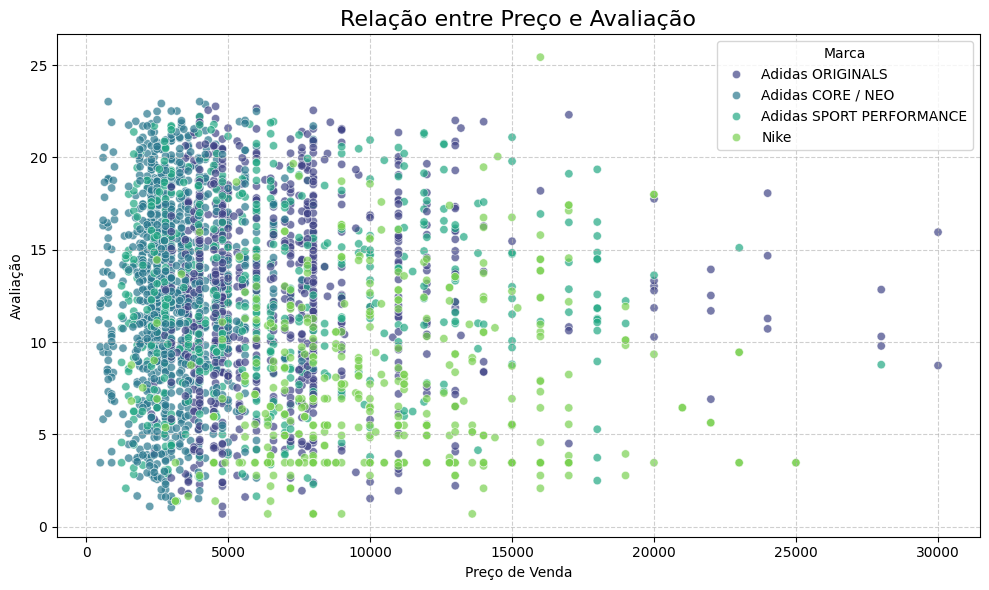

In [30]:
#Correlação entre Preço e Score
from os import linesep
df1_filtrado = df1[(df1['Sale Price'] > 0) & (df1['Score Ponderado'] > 0)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1_filtrado, x='Sale Price', y='Score Ponderado', hue='Brand', palette='viridis', alpha=0.7)
plt.title('Relação entre Preço e Score', fontsize = 16)
plt.xlabel('Preço de Venda')
plt.ylabel('Avaliação')
plt.legend(title='Marca', loc='upper right')
plt.grid(True, linestyle ='--', alpha=0.6)
plt.tight_layout()
plt.show()

<Axes: xlabel='Rating', ylabel='Count'>

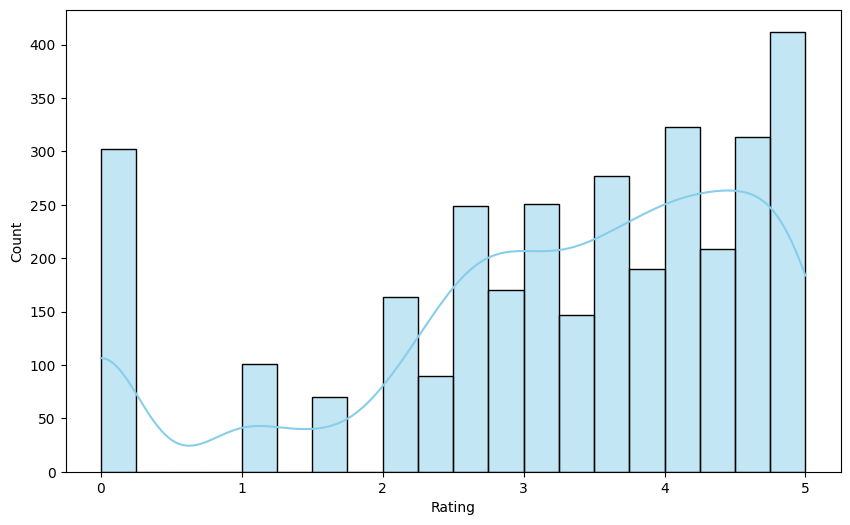

In [35]:
ratings_validos =df1['Rating'].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_validos, bins=20, kde=True, color='skyblue')

<Axes: xlabel='Score Ponderado', ylabel='Count'>

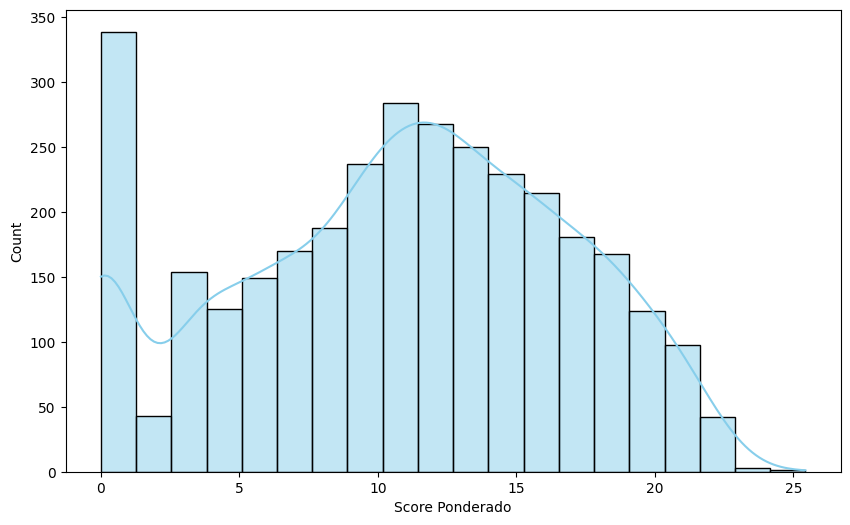

In [57]:
score_validos = df1['Score Ponderado'].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(score_validos, bins=20, kde=True, color='skyblue')

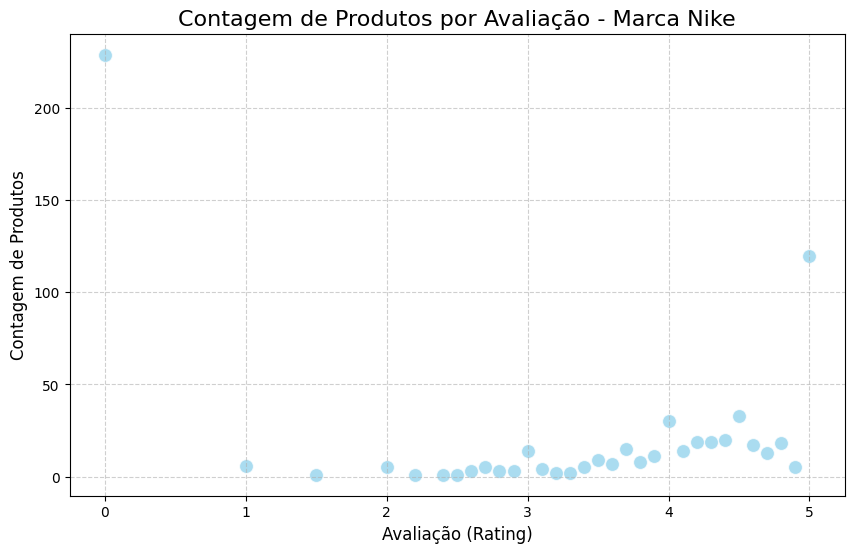

In [116]:
nike_df = df1[df1['Brand'] == 'Nike']
ratings_count1 = nike_df['Rating'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=ratings_count1.index, y=ratings_count1.values, color='skyblue', s=100, alpha=0.7)
plt.title('Contagem de Produtos por Avaliação - Marca Nike', fontsize=16)
plt.xlabel('Avaliação (Rating)', fontsize=12)
plt.ylabel('Contagem de Produtos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

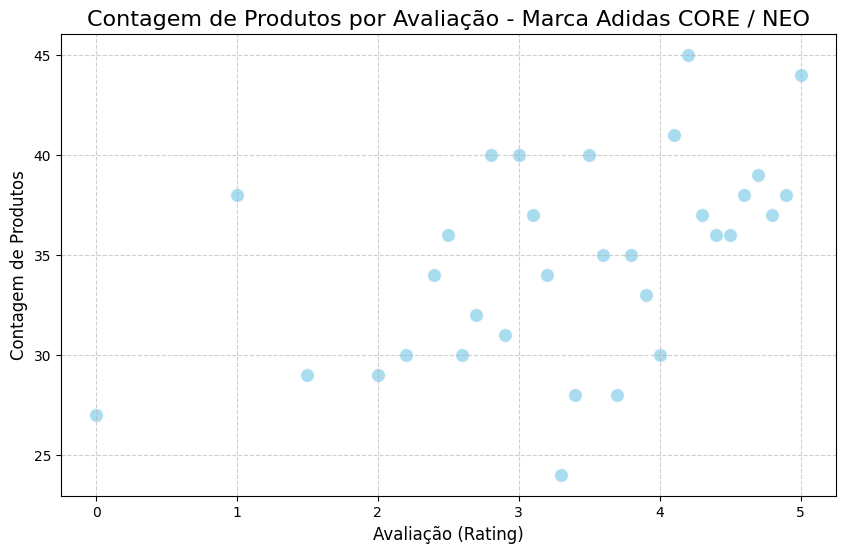

In [119]:
adidasCore_df = df1[df1['Brand'] == 'Adidas CORE / NEO']
rating_count2 = adidasCore_df['Rating'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=rating_count2.index, y=rating_count2.values, color='skyblue', s=100, alpha=0.7)
plt.title('Contagem de Produtos por Avaliação - Marca Adidas CORE / NEO', fontsize=16)
plt.xlabel('Avaliação (Rating)', fontsize=12)
plt.ylabel('Contagem de Produtos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

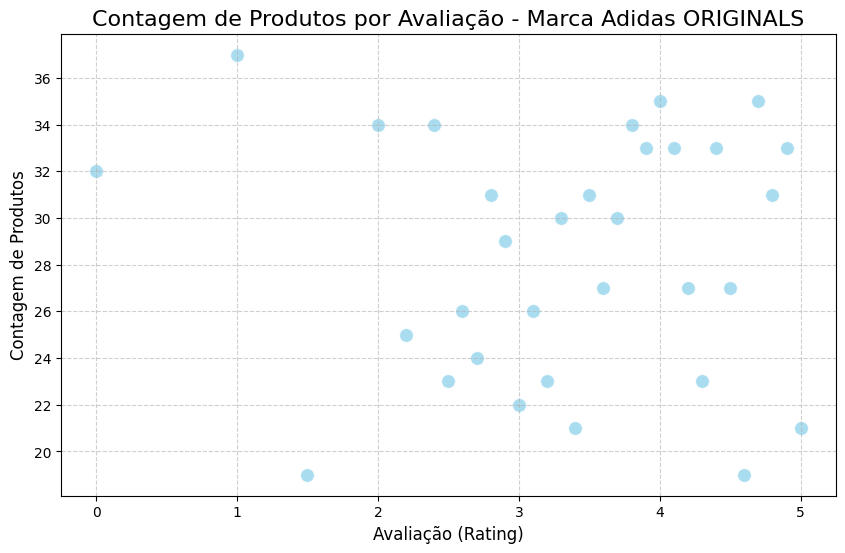

In [120]:
adidasOriginals_df = df1[df1['Brand'] == 'Adidas ORIGINALS']
ratings_count3 = adidasOriginals_df['Rating'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=ratings_count3.index, y=ratings_count3.values, color='skyblue', s=100, alpha=0.7)
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Contagem de Produtos por Avaliação - Marca Adidas ORIGINALS', fontsize=16)
plt.xlabel('Avaliação (Rating)', fontsize=12)
plt.ylabel('Contagem de Produtos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

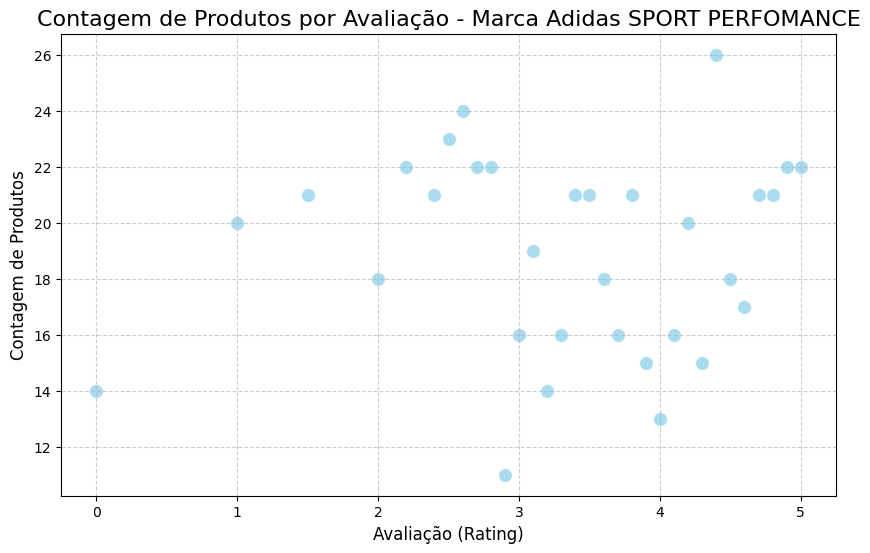

In [121]:
adidasSport_df = df1[df1['Brand'] == 'Adidas SPORT PERFORMANCE']
rating_count4 = adidasSport_df['Rating'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=rating_count4.index, y=rating_count4.values, color='skyblue', s=100, alpha=0.7)
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Contagem de Produtos por Avaliação - Marca Adidas SPORT PERFOMANCE', fontsize=16)
plt.xlabel('Avaliação (Rating)', fontsize=12)
plt.ylabel('Contagem de Produtos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

In [108]:
df1['Last Visited'] = pd.to_datetime(df1['Last Visited'])
df1['Year'] = df1['Last Visited'].dt.year
df1['Month'] = df1['Last Visited'].dt.month
df1['Day'] = df1['Last Visited'].dt.day
df1.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Year,Month,Day,Score Ponderado
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14,2020,4,13,17.940814
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15,2020,4,13,10.622290
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15,2020,4,13,9.457724
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15,2020,4,13,14.692428
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15,2020,4,13,15.016608


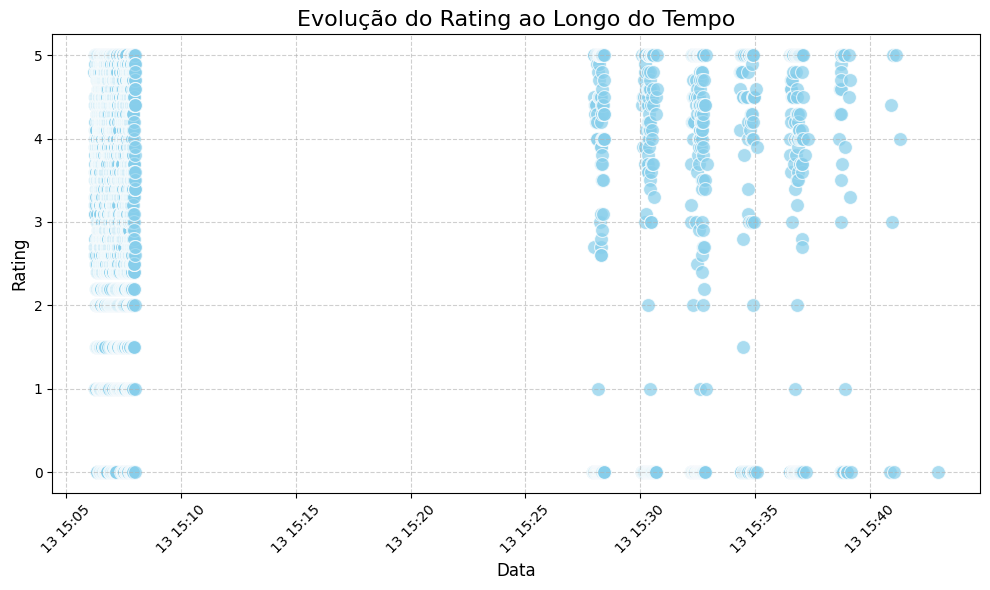

In [123]:
df1 = df1.sort_values(by='Last Visited')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Last Visited', y='Rating', data=df1, color='skyblue', s=100, alpha=0.7)
plt.title('Evolução do Rating ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

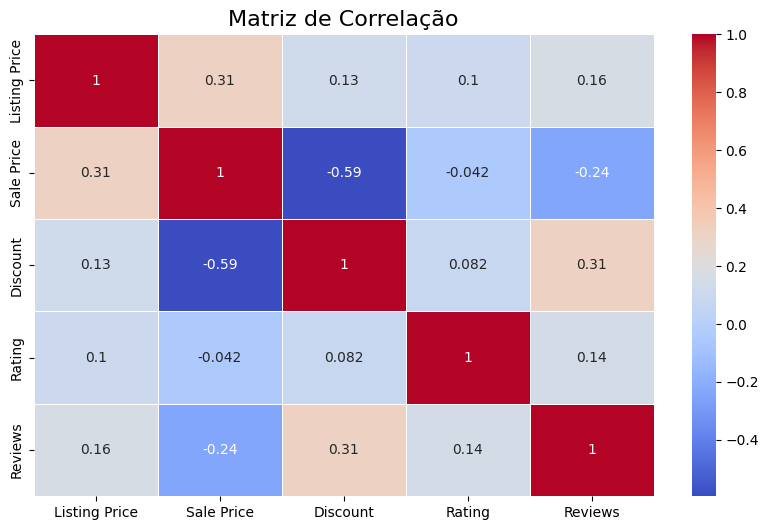

In [129]:
df_numerico = df.select_dtypes(include=['float64', 'int64'])
matrix_correlacao = df_numerico.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(matrix_correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

k =  1  inertia :  133149493989.94853
k =  2  inertia :  74827765600.36945
k =  3  inertia :  42308707903.596115
k =  4  inertia :  30173234495.071148
k =  5  inertia :  24797194691.99319
k =  6  inertia :  18125388151.013542
k =  7  inertia :  15484451836.882023
k =  8  inertia :  13273733439.344946
k =  9  inertia :  11369935414.433798
k =  10  inertia :  9889124864.764212


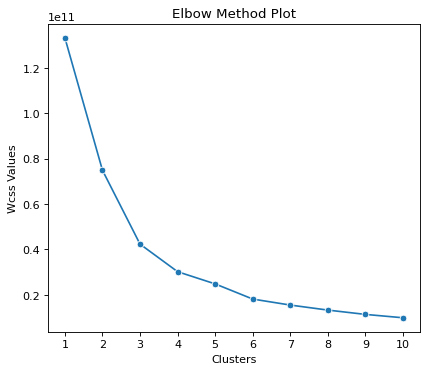

In [133]:
arr_dataset = df1.iloc[:, [2,3,4,7,8]].values


wcss = []

for i in range(1,11):
  kmeans = KMeans(
      n_clusters = i,
      init = 'k-means++',
      random_state=42
  )
  kmeans.fit(arr_dataset)
  print('k = ', i, ' inertia : ', kmeans.inertia_)
  wcss.append([i, kmeans.inertia_]) # kmeans.inertia_ returns the calculated WCSS Values

wcss_dataframe = pd.DataFrame(wcss, columns=['clusters','wcss value'])

# Plot for Elbow Method
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['figure.dpi'] = 80
sns.lineplot(
    x = wcss_dataframe.clusters.values,
    y = wcss_dataframe['wcss value'], marker='o'
)
plt.xticks(np.arange(1,11))
plt.xlabel('Clusters')
plt.ylabel('Wcss Values')
plt.title('Elbow Method Plot')
plt.show()